<a href="https://colab.research.google.com/github/zeynab1013/Coupled-Power-Law-Dark-Energy-and-Dark-Matter-Model/blob/main/fig_5_joachim_paper_kids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install virtualenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 8.4 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount("/content/drive")
!virtualenv /content/drive/MyDrive/colab_env
!source /content/drive/MyDrive/colab_env/bin/activate;
import sys
sys.path.append("/content/drive/MyDrive/colab_env/lib/python3.10/site-packages")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
created virtual environment CPython3.10.12.final.0-64 in 10693ms
  creator CPython3Posix(dest=/content/drive/MyDrive/colab_env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: GetDist==1.4.3, Pillow==10.0.0, PyYAML==6.0.1, Py_BOBYQA==1.4, Pygments==2.16.1, astropy==5.3.2, cached_property==1.5.2, camb==1.5.0, certifi==2023.7.22, charset_normalizer==3.2.0, click==8.1.7, cobaya==3.3.2, contourpy==1.1.0, cycler==0.11.0, deprecation==2.1.0, dill==0.3.7, fonttools==4.42.1, fuzzywuzzy==0.18.0, hmf==3.4.4, idna==3.4, kiwisolver==1.4.5, markdown_it_py==3.0.0, matplotlib==3.7.2, mdurl==0.1.2, mpmath==1.3.0, numpy==1.25.2, packaging==23.1, pandas==2.1.0, pip==24.3.1, portalocker==2.7.0, pyerfa==2.0.0.3, pyparsin

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, Matern, RationalQuadratic, DotProduct, WhiteKernel, ExpSineSquared

import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300
from matplotlib import colors
from matplotlib import colormaps as cm

#plt.style.use('classic')
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

In [5]:
path1 = '/content/drive/MyDrive/colab_env/ForElena/'

In [6]:
cosmo_param=np.loadtxt(path1+'cosmo/cosmoSLICS_Cosmologies_Omm_S8_h_w0_sigma8.dat') ## cosmological parameters
np.shape(cosmo_param)

(26, 5)

In [7]:
Om=cosmo_param[:,0]
S8=cosmo_param[:,1]
h0=cosmo_param[:,2]
w0=cosmo_param[:,3]
sigma8=cosmo_param[:,4]

np.shape(cosmo_param[:,:4])

(26, 4)

# **Cov Mat**

Text(0.5, 1.0, 'kids cov matrix')

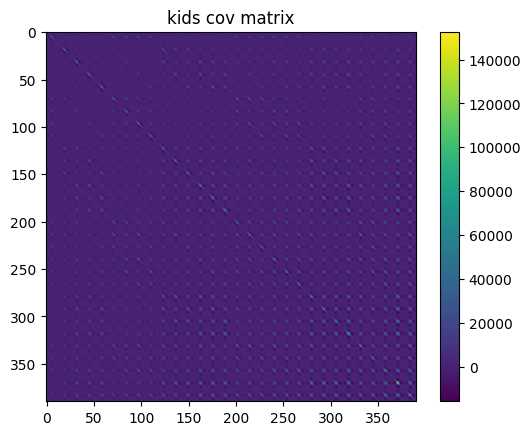

In [8]:
import gzip, pickle

covm=np.loadtxt(path1+'SNR_12.5_FullData_cov_mask_KiDS1000.dat') ## cosmological parameters
plt.imshow(covm)
plt.colorbar()
#plt.xlabel('k',fontsize=18)
plt.title('kids cov matrix')



In [ ]:
np.shape(covm)

(390, 390)

# I want to iterate over all 30 tomographic bins

In [9]:
snr=np.loadtxt(path1+'training/signal/SNR_bins.dat')

#different cosmologies
X_LCDM=cosmo_param[-1, :4] #cosmological pars for LCDM
X_LCDM = np.expand_dims(X_LCDM, axis=0) ## needed for the GP emulator from sklearn
X_LCDM_out = cosmo_param[:-1, :4]
#print(np.shape(X_LCDM_out))

err=[np.loadtxt(path1+'training/error/Data_Err_12.5_tomo'+str(i)+'_74-199.dat')for i in range(1,31)]
train_err=np.array(err)

# Pre-load data into a dictionary
data_dict = {}
data_train = np.zeros((26,390))

for j in range(1, 31):
    a = [np.loadtxt(path1 + 'training/signal/Data_' + str(i) + '_12.5_tomo' + str(j) + '.dat')[:, 1] for i in range(26)]
    data_dict[j] = a
    data_dict[j] = np.array(data_dict[j])


for i in range(26):
    a = [np.loadtxt(path1 + 'training/signal/Data_' + str(i) + '_12.5_tomo' + str(j) + '.dat')[:, 1] for j in range(1,31)]
    data_train[i] = np.array(a).ravel()

In [10]:
np.shape(data_train)

(26, 390)

In [11]:
kernel = ConstantKernel(1, (1e-3, 1e3)) * RBF()

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)

def ypred_func(om, s8, h0, w0):
    return gp.predict(np.array([[om, s8, h0, w0]])).ravel()


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarni

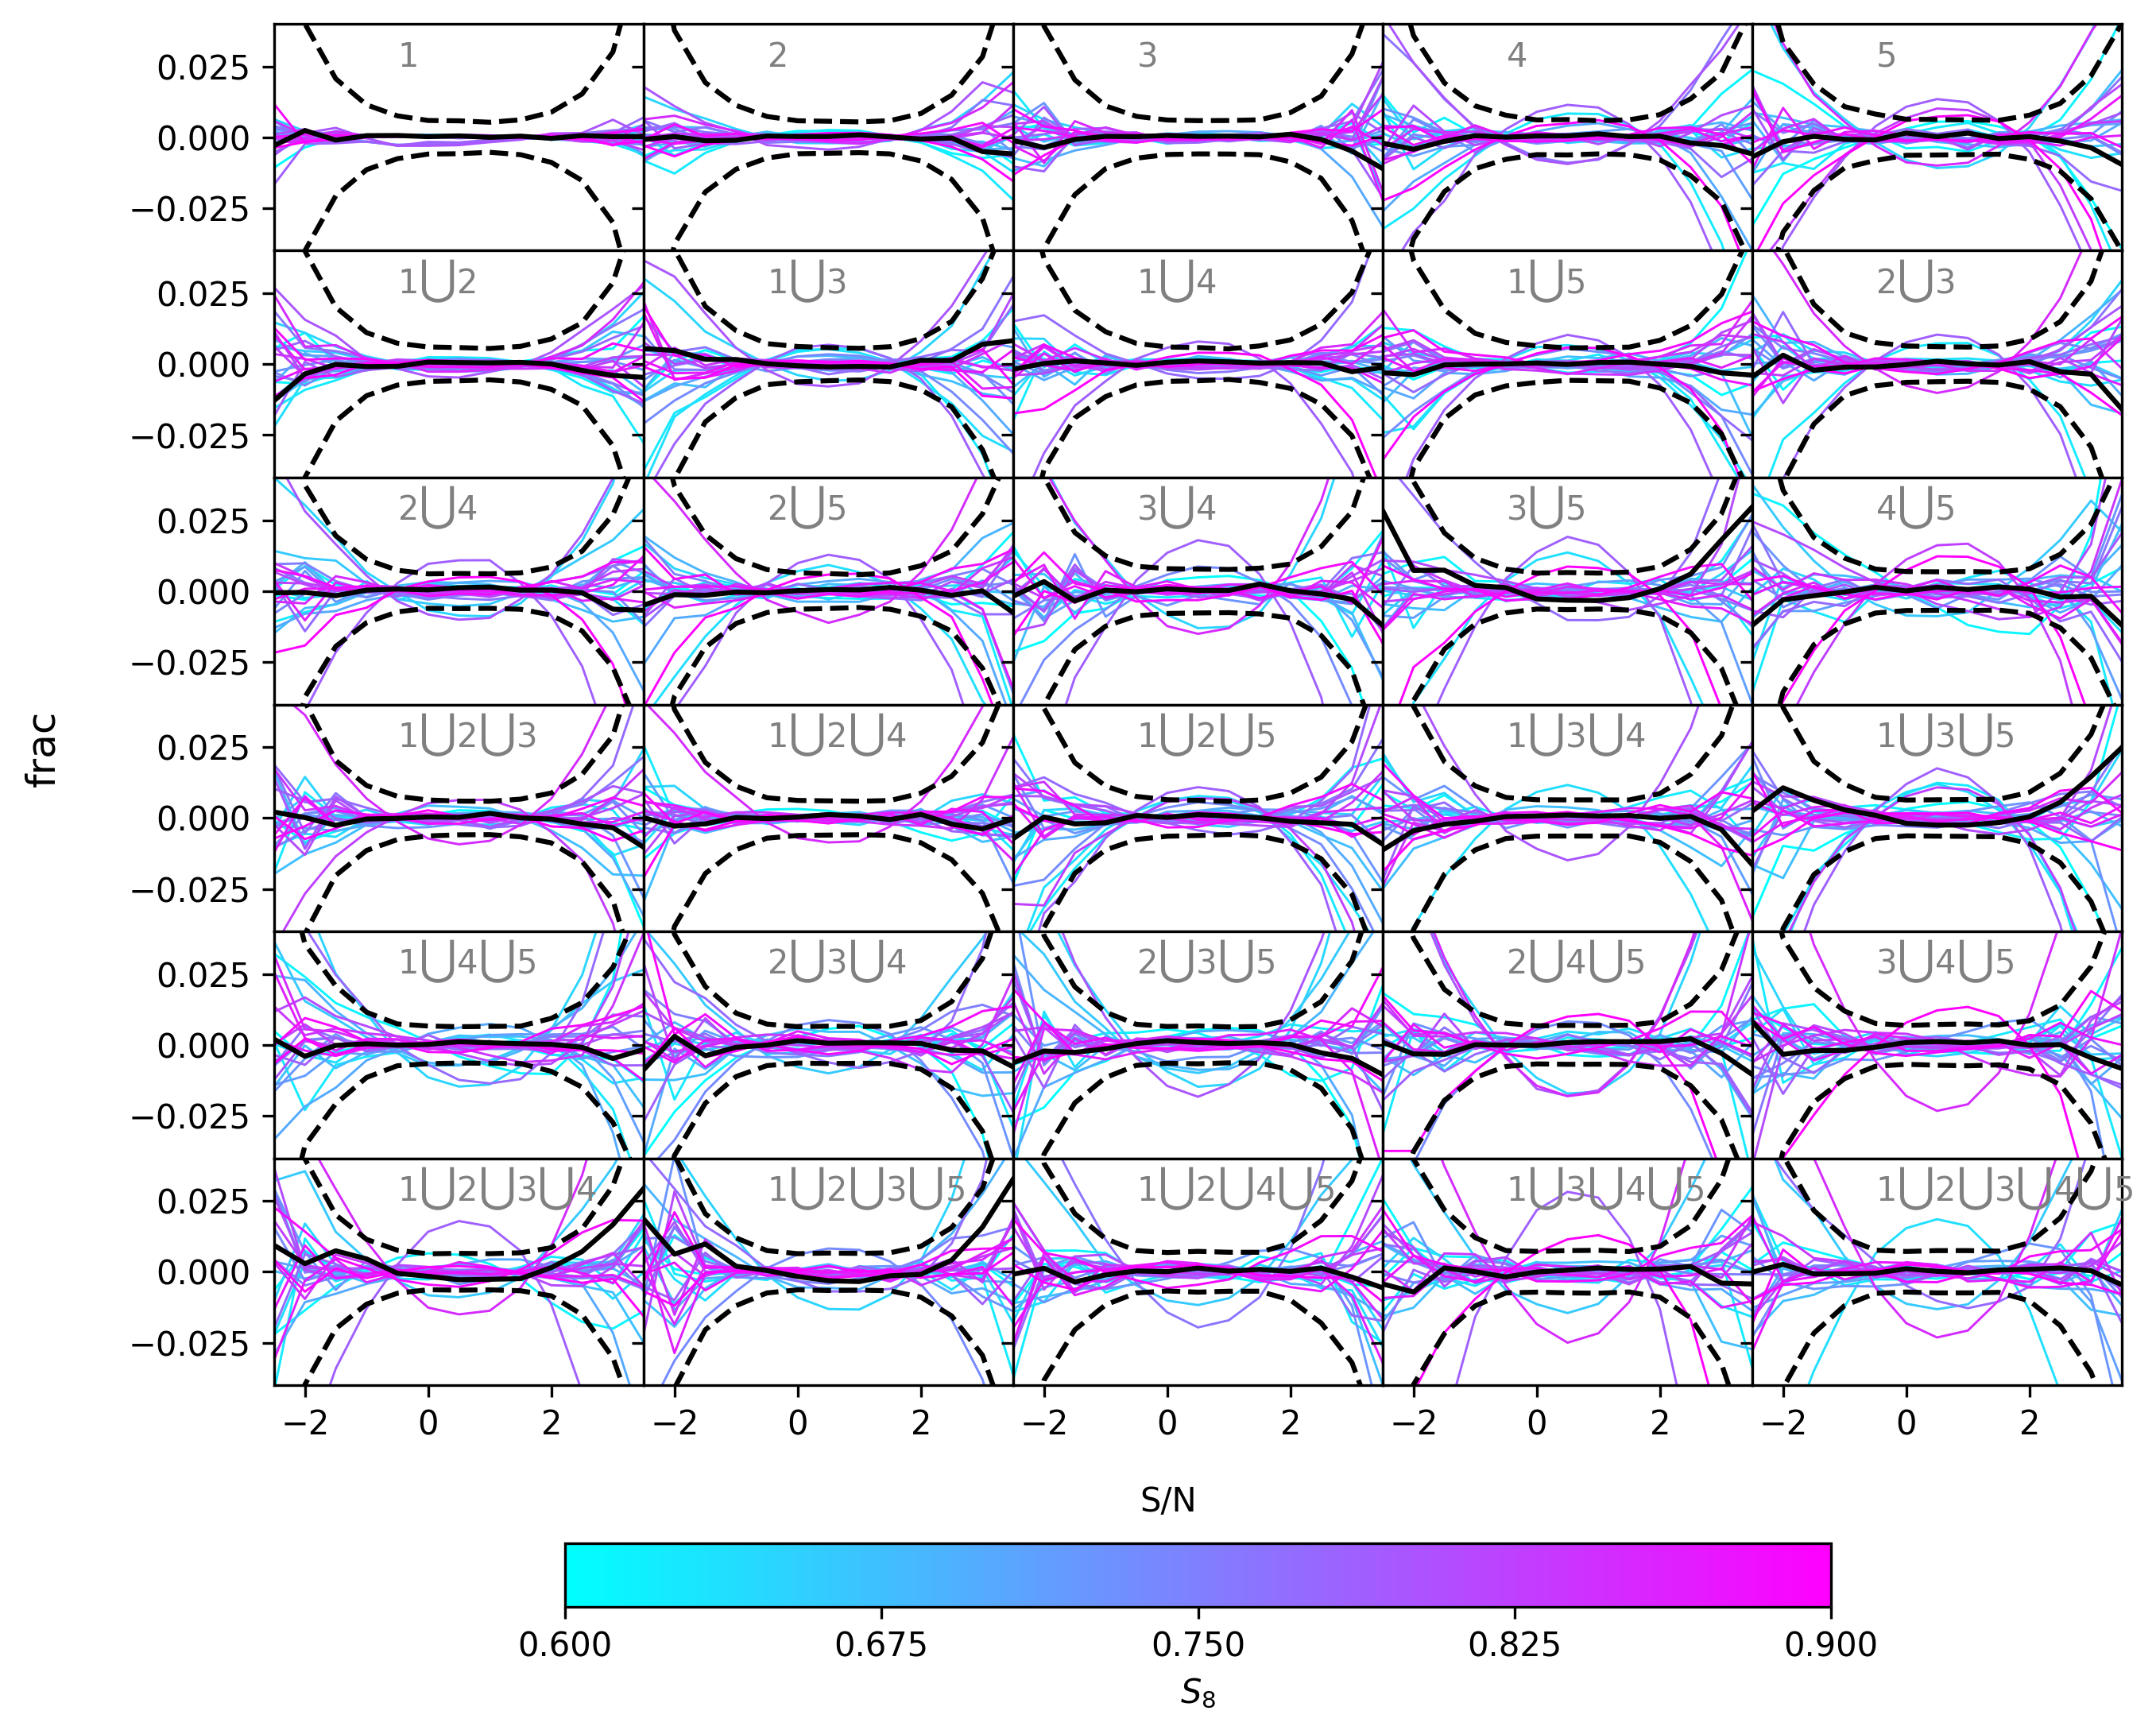

In [ ]:
#plot initializer
fig, axs = plt.subplots(ncols=5, nrows=6, figsize=(10, 8), sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0, 'bottom': 0.05}, dpi=300)
n_lines = 25
cmap = mpl.colormaps['cool']

#Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, n_lines))

for i in range(25):
    X_model_i = cosmo_param[i,:4]
    X_model_i = np.expand_dims(X_model_i, axis=0)
    X_model_i_out =  np.delete(cosmo_param[:,:4], i, axis=0)

    frac_err = np.zeros((30,13))

    for j in range(1,31):
        Ytrain = data_dict[j]
        #print(np.shape(Ytrain))
        Y_model_i = Ytrain[i]
        Y_model_i = np.expand_dims(Y_model_i, axis=0)
        #gp.fit(cosmo_param[:,:4], Ytrain)
        #Ypred_model_i = gp.predict(X_model_i).ravel() #.ravel() takes all the elements of the array, regardless of their original dimensions, and puts them into a single, long sequence.
        Y_model_i_out_train = np.delete(Ytrain, i, axis=0)
        gp.fit(X_model_i_out, Y_model_i_out_train)
        frac = 1-ypred_func(X_model_i[0][0], X_model_i[0][1], X_model_i[0][2], X_model_i[0][3])/Y_model_i
        frac_err[j-1] = frac
        ax = fig.get_axes()[j-1]  # Access Axes object by index
        ax.plot(snr, frac_err[j-1], color = colors[i,:], linewidth = 0.7) #plot on correct Axes object
        ax.set_xlim(-2.5, 3.5)
        ax.set_ylim(-0.04, 0.04)

frac_err = np.zeros((30,13))

# Now iterate over the  using the pre-loaded data
for j in range(1, 31):
    Ytrain = data_dict[j]
    #print(np.shape(Ytrain))
    Y_LCDM = Ytrain[-1]
    Y_LCDM = np.expand_dims(Y_LCDM, axis=0)
    #print(np.shape(Y_LCDM))
    #gp.fit(cosmo_param[:,:4], Ytrain)
    #Ypred_LCDM = gp.predict(X_LCDM).ravel() #.ravel() takes all the elements of the array, regardless of their original dimensions, and puts them into a single, long sequence.

    Y_LCDM_out_train = Ytrain[:-1]
    gp.fit(X_LCDM_out, Y_LCDM_out_train)
    frac = 1-ypred_func(X_LCDM[0][0], X_LCDM[0][1], X_LCDM[0][2], X_LCDM[0][3])/Y_LCDM
    frac_err[j-1] = frac
    ax = fig.get_axes()[j-1]  # Access Axes object by index
    ax.plot(snr, frac_err[j-1], color = 'black') #plot on correct Axes object
    Y_LCDM = Ytrain[-1] #dimension should be reduced again
    ax.plot(snr, (train_err[j-1])/Y_LCDM, '--', color = 'black')
    ax.plot(snr, -(train_err[j-1])/Y_LCDM, '--', color = 'black')
    ax.set_xlim(-2.5, 3.5)
    ax.set_ylim(-0.04, 0.04)

fig.text(0.5, 0.1, 'S/N', ha='center')
#fig.text(0.04, 0.5, 'S/N', va='center', rotation='vertical')

ax1 = fig.get_axes()[0]
ax1.text(-0.5, .025, r'$1$', color = 'gray')
ax2 = fig.get_axes()[1]
ax2.text(-0.5, .025, r'$2$', color = 'gray')
ax3 = fig.get_axes()[2]
ax3.text(-0.5, .025, r'$3$', color = 'gray')
ax4 = fig.get_axes()[3]
ax4.text(-0.5, .025, r'$4$', color = 'gray')
ax5 = fig.get_axes()[4]
ax5.text(-0.5, .025, r'$5$', color = 'gray')
ax6 = fig.get_axes()[5]
ax6.text(-0.5, .025, r'$1\bigcup2$', color = 'gray')
ax7 = fig.get_axes()[6]
ax7.text(-0.5, .025, r'$1\bigcup3$', color = 'gray')
ax8 = fig.get_axes()[7]
ax8.text(-0.5, .025, r'$1\bigcup4$', color = 'gray')
ax9 = fig.get_axes()[8]
ax9.text(-0.5, .025, r'$1\bigcup5$', color = 'gray')
ax10 = fig.get_axes()[9]
ax10.text(-0.5, .025, r'$2\bigcup3$', color = 'gray')
ax11 = fig.get_axes()[10]
ax11.text(-0.5, .025, r'$2\bigcup4$', color = 'gray')
ax12 = fig.get_axes()[11]
ax12.text(-0.5, .025, r'$2\bigcup5$', color = 'gray')
ax13 = fig.get_axes()[12]
ax13.text(-0.5, .025, r'$3\bigcup4$', color = 'gray')
ax14 = fig.get_axes()[13]
ax14.text(-0.5, .025, r'$3\bigcup5$', color = 'gray')
ax15 = fig.get_axes()[14]
ax15.text(-0.5, .025, r'$4\bigcup5$', color = 'gray')
ax16 = fig.get_axes()[15]
ax16.text(-0.5, .025, r'$1\bigcup2\bigcup3$', color = 'gray')
ax17 = fig.get_axes()[16]
ax17.text(-0.5, .025, r'$1\bigcup2\bigcup4$', color = 'gray')
ax18 = fig.get_axes()[17]
ax18.text(-0.5, .025, r'$1\bigcup2\bigcup5$', color = 'gray')
ax19 = fig.get_axes()[18]
ax19.text(-0.5, .025, r'$1\bigcup3\bigcup4$', color = 'gray')
ax20 = fig.get_axes()[19]
ax20.text(-0.5, .025, r'$1\bigcup3\bigcup5$', color = 'gray')
ax21 = fig.get_axes()[20]
ax21.text(-0.5, .025, r'$1\bigcup4\bigcup5$', color = 'gray')
ax22 = fig.get_axes()[21]
ax22.text(-0.5, .025, r'$2\bigcup3\bigcup4$', color = 'gray')
ax23 = fig.get_axes()[22]
ax23.text(-0.5, .025, r'$2\bigcup3\bigcup5$', color = 'gray')
ax24 = fig.get_axes()[23]
ax24.text(-0.5, .025, r'$2\bigcup4\bigcup5$', color = 'gray')
ax25 = fig.get_axes()[24]
ax25.text(-0.5, .025, r'$3\bigcup4\bigcup5$', color = 'gray')
ax26 = fig.get_axes()[25]
ax26.text(-0.5, .025, r'$1\bigcup2\bigcup3\bigcup4$', color = 'gray')
ax27 = fig.get_axes()[26]
ax27.text(-0.5, .025, r'$1\bigcup2\bigcup3\bigcup5$', color = 'gray')
ax28 = fig.get_axes()[27]
ax28.text(-0.5, .025, r'$1\bigcup2\bigcup4\bigcup5$', color = 'gray')
ax29 = fig.get_axes()[28]
ax29.text(-0.5, .025, r'$1\bigcup3\bigcup4\bigcup5$', color = 'gray')
ax30 = fig.get_axes()[29]
ax30.text(-0.5, .025, r'$1\bigcup2\bigcup3\bigcup4\bigcup5$', color = 'gray')



cbar = fig.colorbar(
    mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0.6, 0.9), cmap=cmap),
    ax=axs,
    orientation='horizontal',
    location='bottom',  # Position the colorbar at the bottom of the grid
    fraction=0.04,  # Fraction of the original axes size for the colorbar
    pad=0.1,  # Padding between the plots and the colorbar
    label='$S_8$',
    ticks=np.linspace(0.6, 0.9, num=5)
)

#plt.ylabel(r'$frac$')#, fontsize=14)
#plt.xlabel(r'$S/N$')#, fontsize=14)
#plt.xticks(fontsize=13)
#plt.yticks(fontsize=13)

#fig.supxlabel('S/N')
fig.supylabel('frac')

for ax in fig.get_axes():
    ax.label_outer()

plt.show()

# **MCMC**

In [12]:
import sys, platform, os
try:
    from cobaya.run import run
except ImportError:
    sys.path.insert(0,'../../cobaya')
    from cobaya.run import run

In [13]:
snr_slics_hr=np.loadtxt(path1+'testing/SLICS-HR/SNR_SLICS_HR.dat')
data_slics_hr=np.loadtxt(path1+'testing/SLICS-HR/data_HR.dat')
data_kids=np.loadtxt(path1+'testing/data/SNR_peaks_KiDS1000_data_good_e2flip.dat')
print(np.shape(covm),'data:', np.shape(data_slics_hr),'snr:',np.shape(snr_slics_hr),np.shape(data_kids)) #these two are the same and are the number of peak counts for the same s/n ratio data as thetraining test

(390, 390) data: (390,) snr: (390,) (390,)


In [14]:
gp.fit(cosmo_param[:,:4], data_train)
ypred_func(cosmo_param[0,0],cosmo_param[0,1],cosmo_param[0,2],cosmo_param[0,3])/data_kids

array([0.96248   , 0.94614458, 1.00006346, 0.99075743, 0.98003439,
       0.99960951, 1.00492731, 1.0073915 , 0.99380248, 0.98448161,
       1.00426187, 1.00005344, 0.98581301, 0.89136364, 0.97308087,
       0.99542966, 0.97014633, 1.00158091, 0.99682051, 1.00734986,
       1.00094519, 0.99454481, 0.99934219, 0.99473831, 0.94671463,
       0.96198251, 0.8068125 , 1.01228767, 0.9987388 , 1.00188565,
       1.01481604, 1.01426367, 0.99373722, 0.99765064, 0.98629002,
       0.99732074, 1.02004353, 1.00460193, 1.09669782, 1.01415   ,
       1.02827004, 1.01077254, 1.01320616, 0.99779702, 0.99128413,
       0.99829928, 1.00849132, 0.99985494, 1.00714642, 0.99706997,
       0.99854175, 0.94882883, 0.87143969, 1.00943378, 0.97710428,
       0.98624825, 0.99402967, 1.00406493, 1.00697674, 1.00689658,
       1.00090632, 0.99884446, 0.96791099, 0.9930362 , 0.90975057,
       0.92037879, 0.99757979, 0.96589517, 0.9883821 , 1.00712224,
       1.00824533, 1.00827591, 1.00810554, 1.01149678, 0.98553

In [29]:
def mu(om, s8, h0, w0):
    return np.array([data_slics_hr - ypred_func(om, s8, h0, w0)])

def mut(om, s8, h0, w0):
    return np.reshape(mu(om, s8, h0, w0),(len(data_slics_hr),1))

def chi2(om, s8, h0, w0, c):
    cinv = np.linalg.inv(c)
    return np.matmul(mu(om, s8, h0, w0),np.matmul(cinv,mut(om, s8, h0, w0)))

N_sim = 1240

def loglike(om, s8, h0, w0, c):
    return -0.5 * N_sim * np.log(1+chi2(om, s8, h0, w0, c)/(N_sim - 1))

def my_like(om, s8, h0, w0):
    return loglike(om, s8, h0, w0, covm)

In [28]:
chi2(0.15, 0.7, 0.58, -1.301, covm)

array([[114.49131198]])

In [30]:
info = {"likelihood": {"external": my_like},
        "params"    : {
            "om": {"prior": {"min": 0.1  , "max": 0.55},"ref": 0.3 ,"latex": r"\Omega_m"},
            "s8"   : {"prior": {"min": 0.6 , "max": 0.9},"ref": 0.727 ,"latex": r"S_8"},
            "h0"    : {"prior": {"min": 0.6  , "max": 0.82},"ref": 0.68 ,"latex": r"h"},
            "w0": {"prior": {"min": -2.0  , "max": -0.5},"ref": -1.05 ,"latex": r"w_0"},
            #"sig8"  : {"derived": lambda om, s8: s8/((om/0.3)**0.5),"latex": r"\sigma_8"}
            #"delta_z": {"prior": {"dist": "norm", "loc": 1, "scale": 0.001}, "ref": 1, "latex": r"\text{mean\_radius}"}
                        },
        "sampler": {"mcmc": {"Rminus1_stop": 0.01, "max_tries": 100000}},
        "output":"kidsdata-peakcounts",
        "force":"True"
        }

In [31]:
from cobaya.run import run
updated_info, sampler = run(info)

INFO:output:Output to be read-from/written-into folder '.', with prefix 'kidsdata-peakcounts'


[output] Output to be read-from/written-into folder '.', with prefix 'kidsdata-peakcounts'


INFO:output:Found existing info files with the requested output prefix: 'kidsdata-peakcounts'


[output] Found existing info files with the requested output prefix: 'kidsdata-peakcounts'


INFO:output:Will delete previous products ('force' was requested).


[output] Will delete previous products ('force' was requested).


INFO:external:Initialized external likelihood.


[external] Initialized external likelihood.


INFO:mcmc:Getting initial point... (this may take a few seconds)


[mcmc] Getting initial point... (this may take a few seconds)


INFO:model:Measuring speeds... (this may take a few seconds)


[model] Measuring speeds... (this may take a few seconds)


INFO:model:Setting measured speeds (per sec): {external: 117.0}


[model] Setting measured speeds (per sec): {external: 117.0}


INFO:mcmc:Initial point: om:0.3, s8:0.727, h0:0.68, w0:-1.05


[mcmc] Initial point: om:0.3, s8:0.727, h0:0.68, w0:-1.05


[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.


INFO:mcmc:Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).


[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).


INFO:mcmc:Sampling!


[mcmc] Sampling!


INFO:mcmc:Progress @ 2024-11-21 22:00:23 : 1 steps taken, and 0 accepted.


[mcmc] Progress @ 2024-11-21 22:00:23 : 1 steps taken, and 0 accepted.


INFO:mcmc:Learn + convergence test @ 160 samples accepted.


[mcmc] Learn + convergence test @ 160 samples accepted.


INFO:mcmc: - Acceptance rate: 0.192


[mcmc]  - Acceptance rate: 0.192


INFO:mcmc: - Convergence of means: R-1 = 0.686350 after 128 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.686350 after 128 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 320 samples accepted.


[mcmc] Learn + convergence test @ 320 samples accepted.


INFO:mcmc: - Acceptance rate: 0.238


[mcmc]  - Acceptance rate: 0.238


INFO:mcmc: - Convergence of means: R-1 = 3.277886 after 256 accepted steps


[mcmc]  - Convergence of means: R-1 = 3.277886 after 256 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 480 samples accepted.


[mcmc] Learn + convergence test @ 480 samples accepted.


INFO:mcmc: - Acceptance rate: 0.232


[mcmc]  - Acceptance rate: 0.232


INFO:mcmc: - Convergence of means: R-1 = 0.513784 after 384 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.513784 after 384 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 640 samples accepted.


[mcmc] Learn + convergence test @ 640 samples accepted.


INFO:mcmc: - Acceptance rate: 0.219


[mcmc]  - Acceptance rate: 0.219


INFO:mcmc: - Convergence of means: R-1 = 0.204115 after 512 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.204115 after 512 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 800 samples accepted.


[mcmc] Learn + convergence test @ 800 samples accepted.


INFO:mcmc: - Acceptance rate: 0.212


[mcmc]  - Acceptance rate: 0.212


INFO:mcmc: - Convergence of means: R-1 = 0.099892 after 640 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.099892 after 640 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 960 samples accepted.


[mcmc] Learn + convergence test @ 960 samples accepted.


INFO:mcmc: - Acceptance rate: 0.204


[mcmc]  - Acceptance rate: 0.204


INFO:mcmc: - Convergence of means: R-1 = 0.060448 after 768 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.060448 after 768 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 1120 samples accepted.


[mcmc] Learn + convergence test @ 1120 samples accepted.


INFO:mcmc: - Acceptance rate: 0.191


[mcmc]  - Acceptance rate: 0.191


INFO:mcmc: - Convergence of means: R-1 = 0.080680 after 896 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.080680 after 896 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 1280 samples accepted.


[mcmc] Learn + convergence test @ 1280 samples accepted.


INFO:mcmc: - Acceptance rate: 0.188


[mcmc]  - Acceptance rate: 0.188


INFO:mcmc: - Convergence of means: R-1 = 0.046726 after 1024 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.046726 after 1024 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 1440 samples accepted.


[mcmc] Learn + convergence test @ 1440 samples accepted.


INFO:mcmc: - Acceptance rate: 0.184


[mcmc]  - Acceptance rate: 0.184


INFO:mcmc: - Convergence of means: R-1 = 0.083309 after 1152 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.083309 after 1152 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 1600 samples accepted.


[mcmc] Learn + convergence test @ 1600 samples accepted.


INFO:mcmc: - Acceptance rate: 0.179


[mcmc]  - Acceptance rate: 0.179


INFO:mcmc: - Convergence of means: R-1 = 0.055478 after 1280 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.055478 after 1280 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Progress @ 2024-11-21 22:01:23 : 9128 steps taken, and 1674 accepted.


[mcmc] Progress @ 2024-11-21 22:01:23 : 9128 steps taken, and 1674 accepted.


INFO:mcmc:Learn + convergence test @ 1760 samples accepted.


[mcmc] Learn + convergence test @ 1760 samples accepted.


INFO:mcmc: - Acceptance rate: 0.175


[mcmc]  - Acceptance rate: 0.175


INFO:mcmc: - Convergence of means: R-1 = 0.050481 after 1408 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.050481 after 1408 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 1920 samples accepted.


[mcmc] Learn + convergence test @ 1920 samples accepted.


INFO:mcmc: - Acceptance rate: 0.173


[mcmc]  - Acceptance rate: 0.173


INFO:mcmc: - Convergence of means: R-1 = 0.055414 after 1536 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.055414 after 1536 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 2080 samples accepted.


[mcmc] Learn + convergence test @ 2080 samples accepted.


INFO:mcmc: - Acceptance rate: 0.171


[mcmc]  - Acceptance rate: 0.171


INFO:mcmc: - Convergence of means: R-1 = 0.058551 after 1664 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.058551 after 1664 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 2240 samples accepted.


[mcmc] Learn + convergence test @ 2240 samples accepted.


INFO:mcmc: - Acceptance rate: 0.169


[mcmc]  - Acceptance rate: 0.169


INFO:mcmc: - Convergence of means: R-1 = 0.086329 after 1792 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.086329 after 1792 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 2400 samples accepted.


[mcmc] Learn + convergence test @ 2400 samples accepted.


INFO:mcmc: - Acceptance rate: 0.169


[mcmc]  - Acceptance rate: 0.169


INFO:mcmc: - Convergence of means: R-1 = 0.046982 after 1920 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.046982 after 1920 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 2560 samples accepted.


[mcmc] Learn + convergence test @ 2560 samples accepted.


INFO:mcmc: - Acceptance rate: 0.168


[mcmc]  - Acceptance rate: 0.168


INFO:mcmc: - Convergence of means: R-1 = 0.030203 after 2048 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.030203 after 2048 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 2720 samples accepted.


[mcmc] Learn + convergence test @ 2720 samples accepted.


INFO:mcmc: - Acceptance rate: 0.167


[mcmc]  - Acceptance rate: 0.167


INFO:mcmc: - Convergence of means: R-1 = 0.035513 after 2176 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.035513 after 2176 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 2880 samples accepted.


[mcmc] Learn + convergence test @ 2880 samples accepted.


INFO:mcmc: - Acceptance rate: 0.166


[mcmc]  - Acceptance rate: 0.166


INFO:mcmc: - Convergence of means: R-1 = 0.047326 after 2304 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.047326 after 2304 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 3040 samples accepted.


[mcmc] Learn + convergence test @ 3040 samples accepted.


INFO:mcmc: - Acceptance rate: 0.165


[mcmc]  - Acceptance rate: 0.165


INFO:mcmc: - Convergence of means: R-1 = 0.071413 after 2432 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.071413 after 2432 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 3200 samples accepted.


[mcmc] Learn + convergence test @ 3200 samples accepted.


INFO:mcmc: - Acceptance rate: 0.164


[mcmc]  - Acceptance rate: 0.164


INFO:mcmc: - Convergence of means: R-1 = 0.015100 after 2560 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.015100 after 2560 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Progress @ 2024-11-21 22:02:23 : 19619 steps taken, and 3355 accepted.


[mcmc] Progress @ 2024-11-21 22:02:23 : 19619 steps taken, and 3355 accepted.


INFO:mcmc:Learn + convergence test @ 3360 samples accepted.


[mcmc] Learn + convergence test @ 3360 samples accepted.


INFO:mcmc: - Acceptance rate: 0.164


[mcmc]  - Acceptance rate: 0.164


INFO:mcmc: - Convergence of means: R-1 = 0.028074 after 2688 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.028074 after 2688 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 3520 samples accepted.


[mcmc] Learn + convergence test @ 3520 samples accepted.


INFO:mcmc: - Acceptance rate: 0.162


[mcmc]  - Acceptance rate: 0.162


INFO:mcmc: - Convergence of means: R-1 = 0.034841 after 2816 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.034841 after 2816 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 3680 samples accepted.


[mcmc] Learn + convergence test @ 3680 samples accepted.


INFO:mcmc: - Acceptance rate: 0.163


[mcmc]  - Acceptance rate: 0.163


INFO:mcmc: - Convergence of means: R-1 = 0.030666 after 2944 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.030666 after 2944 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 3840 samples accepted.


[mcmc] Learn + convergence test @ 3840 samples accepted.


INFO:mcmc: - Acceptance rate: 0.163


[mcmc]  - Acceptance rate: 0.163


INFO:mcmc: - Convergence of means: R-1 = 0.018939 after 3072 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.018939 after 3072 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 4000 samples accepted.


[mcmc] Learn + convergence test @ 4000 samples accepted.


INFO:mcmc: - Acceptance rate: 0.163


[mcmc]  - Acceptance rate: 0.163


INFO:mcmc: - Convergence of means: R-1 = 0.026586 after 3200 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.026586 after 3200 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 4160 samples accepted.


[mcmc] Learn + convergence test @ 4160 samples accepted.


INFO:mcmc: - Acceptance rate: 0.163


[mcmc]  - Acceptance rate: 0.163


INFO:mcmc: - Convergence of means: R-1 = 0.027501 after 3328 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.027501 after 3328 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 4320 samples accepted.


[mcmc] Learn + convergence test @ 4320 samples accepted.


INFO:mcmc: - Acceptance rate: 0.164


[mcmc]  - Acceptance rate: 0.164


INFO:mcmc: - Convergence of means: R-1 = 0.018319 after 3456 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.018319 after 3456 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 4480 samples accepted.


[mcmc] Learn + convergence test @ 4480 samples accepted.


INFO:mcmc: - Acceptance rate: 0.164


[mcmc]  - Acceptance rate: 0.164


INFO:mcmc: - Convergence of means: R-1 = 0.040150 after 3584 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.040150 after 3584 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 4640 samples accepted.


[mcmc] Learn + convergence test @ 4640 samples accepted.


INFO:mcmc: - Acceptance rate: 0.165


[mcmc]  - Acceptance rate: 0.165


INFO:mcmc: - Convergence of means: R-1 = 0.026843 after 3712 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.026843 after 3712 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 4800 samples accepted.


[mcmc] Learn + convergence test @ 4800 samples accepted.


INFO:mcmc: - Acceptance rate: 0.164


[mcmc]  - Acceptance rate: 0.164


INFO:mcmc: - Convergence of means: R-1 = 0.019582 after 3840 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.019582 after 3840 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 4960 samples accepted.


[mcmc] Learn + convergence test @ 4960 samples accepted.


INFO:mcmc: - Acceptance rate: 0.164


[mcmc]  - Acceptance rate: 0.164


INFO:mcmc: - Convergence of means: R-1 = 0.014069 after 3968 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.014069 after 3968 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Progress @ 2024-11-21 22:03:23 : 29704 steps taken, and 5060 accepted.


[mcmc] Progress @ 2024-11-21 22:03:23 : 29704 steps taken, and 5060 accepted.


INFO:mcmc:Learn + convergence test @ 5120 samples accepted.


[mcmc] Learn + convergence test @ 5120 samples accepted.


INFO:mcmc: - Acceptance rate: 0.164


[mcmc]  - Acceptance rate: 0.164


INFO:mcmc: - Convergence of means: R-1 = 0.024527 after 4096 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.024527 after 4096 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 5280 samples accepted.


[mcmc] Learn + convergence test @ 5280 samples accepted.


INFO:mcmc: - Acceptance rate: 0.164


[mcmc]  - Acceptance rate: 0.164


INFO:mcmc: - Convergence of means: R-1 = 0.020815 after 4224 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.020815 after 4224 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 5440 samples accepted.


[mcmc] Learn + convergence test @ 5440 samples accepted.


INFO:mcmc: - Acceptance rate: 0.164


[mcmc]  - Acceptance rate: 0.164


INFO:mcmc: - Convergence of means: R-1 = 0.024813 after 4352 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.024813 after 4352 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 5600 samples accepted.


[mcmc] Learn + convergence test @ 5600 samples accepted.


INFO:mcmc: - Acceptance rate: 0.164


[mcmc]  - Acceptance rate: 0.164


INFO:mcmc: - Convergence of means: R-1 = 0.029583 after 4480 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.029583 after 4480 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 5760 samples accepted.


[mcmc] Learn + convergence test @ 5760 samples accepted.


INFO:mcmc: - Acceptance rate: 0.163


[mcmc]  - Acceptance rate: 0.163


INFO:mcmc: - Convergence of means: R-1 = 0.016268 after 4608 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.016268 after 4608 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 5920 samples accepted.


[mcmc] Learn + convergence test @ 5920 samples accepted.


INFO:mcmc: - Acceptance rate: 0.163


[mcmc]  - Acceptance rate: 0.163


INFO:mcmc: - Convergence of means: R-1 = 0.016892 after 4736 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.016892 after 4736 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 6080 samples accepted.


[mcmc] Learn + convergence test @ 6080 samples accepted.


INFO:mcmc: - Acceptance rate: 0.164


[mcmc]  - Acceptance rate: 0.164


INFO:mcmc: - Convergence of means: R-1 = 0.012539 after 4864 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.012539 after 4864 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 6240 samples accepted.


[mcmc] Learn + convergence test @ 6240 samples accepted.


INFO:mcmc: - Acceptance rate: 0.164


[mcmc]  - Acceptance rate: 0.164


INFO:mcmc: - Convergence of means: R-1 = 0.014754 after 4992 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.014754 after 4992 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 6400 samples accepted.


[mcmc] Learn + convergence test @ 6400 samples accepted.


INFO:mcmc: - Acceptance rate: 0.164


[mcmc]  - Acceptance rate: 0.164


INFO:mcmc: - Convergence of means: R-1 = 0.018021 after 5120 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.018021 after 5120 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 6560 samples accepted.


[mcmc] Learn + convergence test @ 6560 samples accepted.


INFO:mcmc: - Acceptance rate: 0.164


[mcmc]  - Acceptance rate: 0.164


INFO:mcmc: - Convergence of means: R-1 = 0.018780 after 5248 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.018780 after 5248 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 6720 samples accepted.


[mcmc] Learn + convergence test @ 6720 samples accepted.


INFO:mcmc: - Acceptance rate: 0.164


[mcmc]  - Acceptance rate: 0.164


INFO:mcmc: - Convergence of means: R-1 = 0.016234 after 5376 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.016234 after 5376 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Progress @ 2024-11-21 22:04:23 : 39866 steps taken, and 6722 accepted.


[mcmc] Progress @ 2024-11-21 22:04:23 : 39866 steps taken, and 6722 accepted.


INFO:mcmc:Learn + convergence test @ 6880 samples accepted.


[mcmc] Learn + convergence test @ 6880 samples accepted.


INFO:mcmc: - Acceptance rate: 0.164


[mcmc]  - Acceptance rate: 0.164


INFO:mcmc: - Convergence of means: R-1 = 0.035063 after 5504 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.035063 after 5504 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 7040 samples accepted.


[mcmc] Learn + convergence test @ 7040 samples accepted.


INFO:mcmc: - Acceptance rate: 0.164


[mcmc]  - Acceptance rate: 0.164


INFO:mcmc: - Convergence of means: R-1 = 0.029852 after 5632 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.029852 after 5632 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 7200 samples accepted.


[mcmc] Learn + convergence test @ 7200 samples accepted.


INFO:mcmc: - Acceptance rate: 0.165


[mcmc]  - Acceptance rate: 0.165


INFO:mcmc: - Convergence of means: R-1 = 0.019525 after 5760 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.019525 after 5760 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 7360 samples accepted.


[mcmc] Learn + convergence test @ 7360 samples accepted.


INFO:mcmc: - Acceptance rate: 0.166


[mcmc]  - Acceptance rate: 0.166


INFO:mcmc: - Convergence of means: R-1 = 0.023748 after 5888 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.023748 after 5888 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 7520 samples accepted.


[mcmc] Learn + convergence test @ 7520 samples accepted.


INFO:mcmc: - Acceptance rate: 0.166


[mcmc]  - Acceptance rate: 0.166


INFO:mcmc: - Convergence of means: R-1 = 0.019231 after 6016 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.019231 after 6016 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 7680 samples accepted.


[mcmc] Learn + convergence test @ 7680 samples accepted.


INFO:mcmc: - Acceptance rate: 0.167


[mcmc]  - Acceptance rate: 0.167


INFO:mcmc: - Convergence of means: R-1 = 0.012775 after 6144 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.012775 after 6144 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 7840 samples accepted.


[mcmc] Learn + convergence test @ 7840 samples accepted.


INFO:mcmc: - Acceptance rate: 0.166


[mcmc]  - Acceptance rate: 0.166


INFO:mcmc: - Convergence of means: R-1 = 0.011421 after 6272 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.011421 after 6272 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 8000 samples accepted.


[mcmc] Learn + convergence test @ 8000 samples accepted.


INFO:mcmc: - Acceptance rate: 0.166


[mcmc]  - Acceptance rate: 0.166


INFO:mcmc: - Convergence of means: R-1 = 0.008856 after 6400 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.008856 after 6400 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 8160 samples accepted.


[mcmc] Learn + convergence test @ 8160 samples accepted.


INFO:mcmc: - Acceptance rate: 0.166


[mcmc]  - Acceptance rate: 0.166


INFO:mcmc: - Convergence of means: R-1 = 0.012759 after 6528 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.012759 after 6528 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Progress @ 2024-11-21 22:05:23 : 49055 steps taken, and 8316 accepted.


[mcmc] Progress @ 2024-11-21 22:05:23 : 49055 steps taken, and 8316 accepted.


INFO:mcmc:Learn + convergence test @ 8320 samples accepted.


[mcmc] Learn + convergence test @ 8320 samples accepted.


INFO:mcmc: - Acceptance rate: 0.166


[mcmc]  - Acceptance rate: 0.166


INFO:mcmc: - Convergence of means: R-1 = 0.011803 after 6656 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.011803 after 6656 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 8480 samples accepted.


[mcmc] Learn + convergence test @ 8480 samples accepted.


INFO:mcmc: - Acceptance rate: 0.166


[mcmc]  - Acceptance rate: 0.166


INFO:mcmc: - Convergence of means: R-1 = 0.012204 after 6784 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.012204 after 6784 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 8640 samples accepted.


[mcmc] Learn + convergence test @ 8640 samples accepted.


INFO:mcmc: - Acceptance rate: 0.166


[mcmc]  - Acceptance rate: 0.166


INFO:mcmc: - Convergence of means: R-1 = 0.007279 after 6912 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.007279 after 6912 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 8800 samples accepted.


[mcmc] Learn + convergence test @ 8800 samples accepted.


INFO:mcmc: - Acceptance rate: 0.166


[mcmc]  - Acceptance rate: 0.166


INFO:mcmc: - Convergence of means: R-1 = 0.011938 after 7040 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.011938 after 7040 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 8960 samples accepted.


[mcmc] Learn + convergence test @ 8960 samples accepted.


INFO:mcmc: - Acceptance rate: 0.167


[mcmc]  - Acceptance rate: 0.167


INFO:mcmc: - Convergence of means: R-1 = 0.010442 after 7168 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.010442 after 7168 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 9120 samples accepted.


[mcmc] Learn + convergence test @ 9120 samples accepted.


INFO:mcmc: - Acceptance rate: 0.167


[mcmc]  - Acceptance rate: 0.167


INFO:mcmc: - Convergence of means: R-1 = 0.013570 after 7296 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.013570 after 7296 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 9280 samples accepted.


[mcmc] Learn + convergence test @ 9280 samples accepted.


INFO:mcmc: - Acceptance rate: 0.167


[mcmc]  - Acceptance rate: 0.167


INFO:mcmc: - Convergence of means: R-1 = 0.016145 after 7424 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.016145 after 7424 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 9440 samples accepted.


[mcmc] Learn + convergence test @ 9440 samples accepted.


INFO:mcmc: - Acceptance rate: 0.167


[mcmc]  - Acceptance rate: 0.167


INFO:mcmc: - Convergence of means: R-1 = 0.018277 after 7552 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.018277 after 7552 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 9600 samples accepted.


[mcmc] Learn + convergence test @ 9600 samples accepted.


INFO:mcmc: - Acceptance rate: 0.167


[mcmc]  - Acceptance rate: 0.167


INFO:mcmc: - Convergence of means: R-1 = 0.020662 after 7680 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.020662 after 7680 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 9760 samples accepted.


[mcmc] Learn + convergence test @ 9760 samples accepted.


INFO:mcmc: - Acceptance rate: 0.167


[mcmc]  - Acceptance rate: 0.167


INFO:mcmc: - Convergence of means: R-1 = 0.019163 after 7808 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.019163 after 7808 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 9920 samples accepted.


[mcmc] Learn + convergence test @ 9920 samples accepted.


INFO:mcmc: - Acceptance rate: 0.167


[mcmc]  - Acceptance rate: 0.167


INFO:mcmc: - Convergence of means: R-1 = 0.027417 after 7936 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.027417 after 7936 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Progress @ 2024-11-21 22:06:23 : 59071 steps taken, and 10028 accepted.


[mcmc] Progress @ 2024-11-21 22:06:23 : 59071 steps taken, and 10028 accepted.


INFO:mcmc:Learn + convergence test @ 10080 samples accepted.


[mcmc] Learn + convergence test @ 10080 samples accepted.


INFO:mcmc: - Acceptance rate: 0.167


[mcmc]  - Acceptance rate: 0.167


INFO:mcmc: - Convergence of means: R-1 = 0.023494 after 8064 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.023494 after 8064 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 10240 samples accepted.


[mcmc] Learn + convergence test @ 10240 samples accepted.


INFO:mcmc: - Acceptance rate: 0.167


[mcmc]  - Acceptance rate: 0.167


INFO:mcmc: - Convergence of means: R-1 = 0.012542 after 8192 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.012542 after 8192 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 10400 samples accepted.


[mcmc] Learn + convergence test @ 10400 samples accepted.


INFO:mcmc: - Acceptance rate: 0.167


[mcmc]  - Acceptance rate: 0.167


INFO:mcmc: - Convergence of means: R-1 = 0.013636 after 8320 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.013636 after 8320 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 10560 samples accepted.


[mcmc] Learn + convergence test @ 10560 samples accepted.


INFO:mcmc: - Acceptance rate: 0.167


[mcmc]  - Acceptance rate: 0.167


INFO:mcmc: - Convergence of means: R-1 = 0.010644 after 8448 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.010644 after 8448 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 10720 samples accepted.


[mcmc] Learn + convergence test @ 10720 samples accepted.


INFO:mcmc: - Acceptance rate: 0.167


[mcmc]  - Acceptance rate: 0.167


INFO:mcmc: - Convergence of means: R-1 = 0.008179 after 8576 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.008179 after 8576 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 10880 samples accepted.


[mcmc] Learn + convergence test @ 10880 samples accepted.


INFO:mcmc: - Acceptance rate: 0.167


[mcmc]  - Acceptance rate: 0.167


INFO:mcmc: - Convergence of means: R-1 = 0.007102 after 8704 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.007102 after 8704 accepted steps


INFO:mcmc: - Convergence of bounds: R-1 = 0.072673 after 10880 accepted steps


[mcmc]  - Convergence of bounds: R-1 = 0.072673 after 10880 accepted steps


INFO:mcmc:The run has converged!


[mcmc] The run has converged!


INFO:mcmc:Sampling complete after 10880 accepted steps.


[mcmc] Sampling complete after 10880 accepted steps.


In [32]:
# Export the direct results to GetDist
from getdist.mcsamples import MCSamplesFromCobaya
import getdist.plots as gdplt

gd_samples = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_samples, ["om","s8","w0"], filled=True)
gdplot.export("/content/drive/MyDrive/colab_env/ForElena/kids-posterior.pdf")

In [33]:
print(gd_samples.getTable().tableTex())

\begin{tabular} { l  c}

 Parameter &  95\% limits\\
\hline
{\boldmath$\Omega_m       $} & $0.310^{+0.093}_{-0.087}   $\\

{\boldmath$S_8            $} & $0.813^{+0.065}_{-0.078}   $\\

{\boldmath$h              $} & ---                         \\

{\boldmath$w_0            $} & $-1.09^{+0.43}_{-0.76}     $\\

$\chi^2                    $ & $9.4\,({\nu\rm{:}\,4.1})   $\\

$\chi^2_\mathrm{external}  $ & $9.4\,({\nu\rm{:}\,4.1})   $\\
\hline
\end{tabular}


#**Cov Mat cross-correlation coefficient matrix - Fig. 4**

## **Order of the tomo bins: 1, 2, 3, 4, 5, 1and2, 1and3, 1and4, 1and5, 2and3, ....**

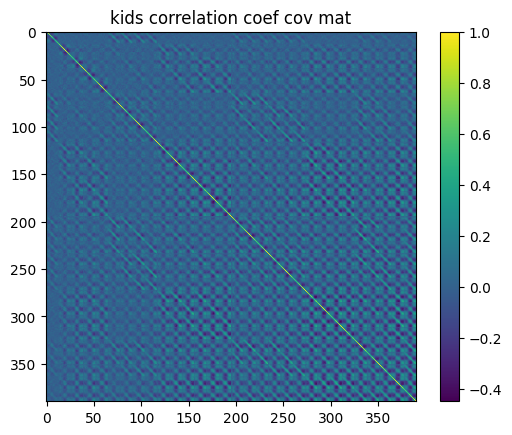

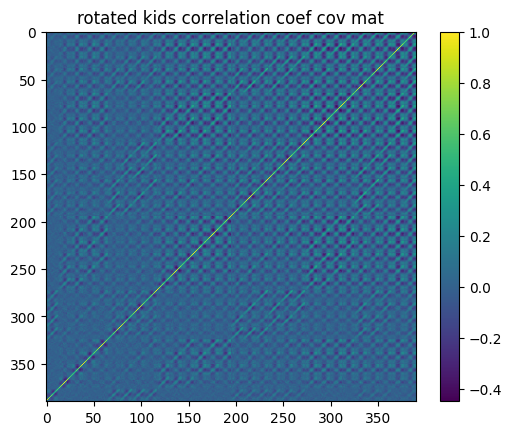

In [ ]:
corr_covm=np.zeros((390,390))

for i in range(390):
  for j in range(390):
    corr_covm[i,j]=covm[i,j]/(np.sqrt(covm[i,i])*np.sqrt(covm[j,j]))

rotated_corr_covm = np.rot90(corr_covm, 1)  # Rotate by 90 degrees (1 * 90) ***counterclockwise***


fig, ax = plt.subplots()
im = ax.imshow(corr_covm)
fig.colorbar(im, ax=ax)
#plt.xlabel('k',fontsize=18)
ax.set_title('kids correlation coef cov mat')


# For the second plot, create a new figure and axes
fig2, ax2 = plt.subplots()
im2 = ax2.imshow(rotated_corr_covm)
fig2.colorbar(im2, ax=ax2)
#plt.xlabel('k',fontsize=18)
ax2.set_title('rotated kids correlation coef cov mat')

plt.show()

In [ ]:
# Likelihood nuisance parameters
  mean_radius:
    prior: {dist: norm, loc: 1, scale: 0.001}
  std_radius: 0.02